--------by amandasbrn--------

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ✍ Read Data

In [133]:
taylor = pd.read_csv('Taylor_Train.csv', delimiter=',', encoding='ISO-8859-1')
taylor.head()

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour
0,Evansville,United States,Roberts Municipal Stadium,Gloriana\r\nKellie Pickler,"7,463 / 7,463","$360,617",Fearless_Tour
1,Jonesboro,United States,Convocation Center,Gloriana\r\nKellie Pickler,"7,822 / 7,822","$340,328",Fearless_Tour
2,St. Louis,United States,Scottrade Center,Gloriana\r\nKellie Pickler,"13,764 / 13,764","$650,420",Fearless_Tour
3,Alexandria,United States,Bishop Ireton High School,Gloriana\r\nKellie Pickler,,,Fearless_Tour
4,North Charleston,United States,North Charleston Coliseum,Gloriana\r\nKellie Pickler,"8,751 / 8,751","$398,154",Fearless_Tour


In [134]:
taylor.shape

(445, 7)

# ✍ Column Descriptions:


1) City: The name of the city where the concert took place.

2) Country: The name of the country where the city is located.

3) Venue: The name of the venue where the concert was held.

4) Opening act(s): The names of the artists or bands who performed as the opening act before the main performer(s).

5) Attendance (tickets sold / available): The number of tickets sold and the total number of tickets available for the concert.

6) Revenue: The revenue generated from ticket sales during the concert.

7) Tour: The name of the concert tour associated with the event.

# 🍳 Data Preparation

## Clean Opening Act column

In [135]:
taylor['Opening act(s)'].unique()

array(['Gloriana\r\nKellie Pickler', '\x97', 'Kellie Pickler',
       'Justin Bieber', 'Gloriana',
       'Gloriana\r\nJustin Bieber\r\nKellie Pickler', 'Sezairi Sezali',
       'Sam Concepcion', 'Saito Johnny', 'Tom Dice', 'Martin & James',
       'Emma Marrone', 'The Bright', 'Ryan Sheridan', 'Needtobreathe',
       'Hot Chelle Rae', 'Ed Sheeran\r\nBrett Eldredge',
       'Ed Sheeran\r\nFlorida Georgia Line',
       'Ed Sheeran\r\nAustin Mahone\r\nBrett Eldredge',
       'Ed Sheeran\r\nAustin Mahone\r\nFlorida Georgia Line',
       'Ed Sheeran\r\nJoel Crouse',
       'Ed Sheeran\r\nAustin Mahone\r\nJoel Crouse',
       'Ed Sheeran\r\nCasey James',
       'Ed Sheeran\r\nAustin Mahone\r\nCasey James', 'Neon Trees',
       'Guy Sebastian\r\nNeon Trees', 'The Vamps', 'Andreas Bourani', nan,
       'CTS', 'Nicole Zefanya', 'Meg Bucsit', 'Imprompt-3', 'IamNeeta',
       'Vance Joy', 'Vance Joy\r\nShawn Mendes', 'James Bay',
       'Vance Joy\r\nShawn Mendes\r\nHaim', 'Vance Joy\r\nHaim',
 

In [ ]:
print(taylor[taylor['Opening act(s)']=='\x97'])


In [137]:
taylor['Opening act(s)'] = taylor['Opening act(s)'].replace('\x97','No Opening Act(s)')

In [138]:
taylor['Opening act(s)'] = taylor['Opening act(s)'].str.replace('\r\n', ' and ')

In [139]:
taylor['Opening act(s)'] = taylor['Opening act(s)'].fillna("No Opening Act(s)")

In [140]:
taylor.head()

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour
0,Evansville,United States,Roberts Municipal Stadium,Gloriana and Kellie Pickler,"7,463 / 7,463","$360,617",Fearless_Tour
1,Jonesboro,United States,Convocation Center,Gloriana and Kellie Pickler,"7,822 / 7,822","$340,328",Fearless_Tour
2,St. Louis,United States,Scottrade Center,Gloriana and Kellie Pickler,"13,764 / 13,764","$650,420",Fearless_Tour
3,Alexandria,United States,Bishop Ireton High School,Gloriana and Kellie Pickler,,,Fearless_Tour
4,North Charleston,United States,North Charleston Coliseum,Gloriana and Kellie Pickler,"8,751 / 8,751","$398,154",Fearless_Tour


In [141]:
taylor['Opening act(s)'] = taylor['Opening act(s)'].str.replace(' and ', ', ')

In [142]:
taylor['Opening act(s)'].unique()

array(['Gloriana, Kellie Pickler', 'No Opening Act(s)', 'Kellie Pickler',
       'Justin Bieber', 'Gloriana',
       'Gloriana, Justin Bieber, Kellie Pickler', 'Sezairi Sezali',
       'Sam Concepcion', 'Saito Johnny', 'Tom Dice', 'Martin & James',
       'Emma Marrone', 'The Bright', 'Ryan Sheridan', 'Needtobreathe',
       'Hot Chelle Rae', 'Ed Sheeran, Brett Eldredge',
       'Ed Sheeran, Florida Georgia Line',
       'Ed Sheeran, Austin Mahone, Brett Eldredge',
       'Ed Sheeran, Austin Mahone, Florida Georgia Line',
       'Ed Sheeran, Joel Crouse',
       'Ed Sheeran, Austin Mahone, Joel Crouse',
       'Ed Sheeran, Casey James',
       'Ed Sheeran, Austin Mahone, Casey James', 'Neon Trees',
       'Guy Sebastian, Neon Trees', 'The Vamps', 'Andreas Bourani', 'CTS',
       'Nicole Zefanya', 'Meg Bucsit', 'Imprompt-3', 'IamNeeta',
       'Vance Joy', 'Vance Joy, Shawn Mendes', 'James Bay',
       'Vance Joy, Shawn Mendes, Haim', 'Vance Joy, Haim',
       'Camila Cabello, Charli XC

## Copy dataset

In [143]:
taylor_df = taylor.copy()

In [144]:
taylor_df.head()

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour
0,Evansville,United States,Roberts Municipal Stadium,"Gloriana, Kellie Pickler","7,463 / 7,463","$360,617",Fearless_Tour
1,Jonesboro,United States,Convocation Center,"Gloriana, Kellie Pickler","7,822 / 7,822","$340,328",Fearless_Tour
2,St. Louis,United States,Scottrade Center,"Gloriana, Kellie Pickler","13,764 / 13,764","$650,420",Fearless_Tour
3,Alexandria,United States,Bishop Ireton High School,"Gloriana, Kellie Pickler",,,Fearless_Tour
4,North Charleston,United States,North Charleston Coliseum,"Gloriana, Kellie Pickler","8,751 / 8,751","$398,154",Fearless_Tour


In [145]:
taylor_df['Number of Opening Act(s)'] = taylor_df['Opening act(s)'].str.count('and') + 1

In [146]:
taylor_df.head()

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour,Number of Opening Act(s)
0,Evansville,United States,Roberts Municipal Stadium,"Gloriana, Kellie Pickler","7,463 / 7,463","$360,617",Fearless_Tour,1
1,Jonesboro,United States,Convocation Center,"Gloriana, Kellie Pickler","7,822 / 7,822","$340,328",Fearless_Tour,1
2,St. Louis,United States,Scottrade Center,"Gloriana, Kellie Pickler","13,764 / 13,764","$650,420",Fearless_Tour,1
3,Alexandria,United States,Bishop Ireton High School,"Gloriana, Kellie Pickler",,,Fearless_Tour,1
4,North Charleston,United States,North Charleston Coliseum,"Gloriana, Kellie Pickler","8,751 / 8,751","$398,154",Fearless_Tour,1


## Check Duplicates
#### I combined city, country, venue, and tour to see if there are any duplicates. and yes there are 116 duplicates
#### I will drop it anyway because there are no other variable to prove that there are no duplication, such as concert date (since 1 city & 1 venue could get more than one date)


In [147]:
taylor_df['UniqueCombined'] = taylor_df['City'].str.cat([taylor_df['Country'], taylor_df['Venue'], taylor_df['Tour']], sep=',')

In [148]:
duplicate_rows = taylor_df[taylor_df['UniqueCombined'].duplicated(keep=False)]
duplicate_rows

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour,Number of Opening Act(s),UniqueCombined
7,London,England,Shepherd's Bush Empire,No Opening Act(s),"6,789 / 6,789","$401,328",Fearless_Tour,1,"London,England,Shepherd's Bush Empire,Fearless..."
8,London,England,Shepherd's Bush Empire,No Opening Act(s),"6,789 / 6,789","$401,328",Fearless_Tour,1,"London,England,Shepherd's Bush Empire,Fearless..."
14,Los Angeles,United States,Staples Center,"Gloriana, Kellie Pickler","13,648 / 13,648","$720,940",Fearless_Tour,1,"Los Angeles,United States,Staples Center,Fearl..."
49,Dallas,United States,American Airlines Center,"Gloriana, Kellie Pickler","13,794 / 13,794","$628,062",Fearless_Tour,1,"Dallas,United States,American Airlines Center,..."
56,Rosemont,United States,Allstate Arena,"Gloriana, Kellie Pickler","26,265 / 26,265","$1,150,896",Fearless_Tour,1,"Rosemont,United States,Allstate Arena,Fearless..."
...,...,...,...,...,...,...,...,...,...
430,Minneapolis,United States,U.S. Bank Stadium,"Camila Cabello, Charli XCX","98,774 / 98,774","$10,242,024",Reputation_Stadium_Tour,1,"Minneapolis,United States,U.S. Bank Stadium,Re..."
436,Arlington,United States,AT&T Stadium,"Camila Cabello, Charli XCX","105,002 / 105,002","$15,006,157",Reputation_Stadium_Tour,1,"Arlington,United States,AT&T Stadium,Reputatio..."
437,Arlington,United States,AT&T Stadium,"Camila Cabello, Charli XCX","105,002 / 105,002","$15,006,157",Reputation_Stadium_Tour,1,"Arlington,United States,AT&T Stadium,Reputatio..."
443,Tokyo,Japan,Tokyo Dome,Charli XCX,"100,109 / 100,109","$14,859,847",Reputation_Stadium_Tour,1,"Tokyo,Japan,Tokyo Dome,Reputation_Stadium_Tour"


In [149]:
taylor_df.drop_duplicates(subset=['UniqueCombined'], inplace=True)

In [150]:
taylor_df.head()

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour,Number of Opening Act(s),UniqueCombined
0,Evansville,United States,Roberts Municipal Stadium,"Gloriana, Kellie Pickler","7,463 / 7,463","$360,617",Fearless_Tour,1,"Evansville,United States,Roberts Municipal Sta..."
1,Jonesboro,United States,Convocation Center,"Gloriana, Kellie Pickler","7,822 / 7,822","$340,328",Fearless_Tour,1,"Jonesboro,United States,Convocation Center,Fea..."
2,St. Louis,United States,Scottrade Center,"Gloriana, Kellie Pickler","13,764 / 13,764","$650,420",Fearless_Tour,1,"St. Louis,United States,Scottrade Center,Fearl..."
3,Alexandria,United States,Bishop Ireton High School,"Gloriana, Kellie Pickler",,,Fearless_Tour,1,"Alexandria,United States,Bishop Ireton High Sc..."
4,North Charleston,United States,North Charleston Coliseum,"Gloriana, Kellie Pickler","8,751 / 8,751","$398,154",Fearless_Tour,1,"North Charleston,United States,North Charlesto..."


In [151]:
taylor_df['UniqueCombined'].duplicated().sum()

0

In [152]:
taylor_df.isnull().sum()

City                                     0
Country                                  0
Venue                                    0
Opening act(s)                           0
Attendance (tickets sold / available)    0
Revenue                                  0
Tour                                     0
Number of Opening Act(s)                 0
UniqueCombined                           0
dtype: int64

## Clean Venue Column

In [ ]:
taylor_df['Venue'].unique()

In [154]:
taylor_df['Venue'] = taylor['Venue'].str.replace('\x96', ' ')

In [ ]:
taylor_df['Venue'].unique()

In [156]:
taylor_df.shape

(329, 9)

## Remove underscore from tour title

In [157]:
taylor_df['Tour'] = taylor_df['Tour'].str.replace('_',' ')

In [158]:
taylor_df.head()

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour,Number of Opening Act(s),UniqueCombined
0,Evansville,United States,Roberts Municipal Stadium,"Gloriana, Kellie Pickler","7,463 / 7,463","$360,617",Fearless Tour,1,"Evansville,United States,Roberts Municipal Sta..."
1,Jonesboro,United States,Convocation Center,"Gloriana, Kellie Pickler","7,822 / 7,822","$340,328",Fearless Tour,1,"Jonesboro,United States,Convocation Center,Fea..."
2,St. Louis,United States,Scottrade Center,"Gloriana, Kellie Pickler","13,764 / 13,764","$650,420",Fearless Tour,1,"St. Louis,United States,Scottrade Center,Fearl..."
3,Alexandria,United States,Bishop Ireton High School,"Gloriana, Kellie Pickler",,,Fearless Tour,1,"Alexandria,United States,Bishop Ireton High Sc..."
4,North Charleston,United States,North Charleston Coliseum,"Gloriana, Kellie Pickler","8,751 / 8,751","$398,154",Fearless Tour,1,"North Charleston,United States,North Charlesto..."


## Splitting Attendance (tickets sold / available) column into two separate columns

In [159]:
taylor_df[['Ticket Sold', 'Ticket Available']] = taylor_df['Attendance (tickets sold / available)'].str.split('/', expand=True)

In [160]:
taylor_df = taylor_df.drop('Attendance (tickets sold / available)', axis=1)

In [161]:
taylor_df.head()

,City,Country,Venue,Opening act(s),Revenue,Tour,Number of Opening Act(s),UniqueCombined,Ticket Sold,Ticket Available
0,Evansville,United States,Roberts Municipal Stadium,"Gloriana, Kellie Pickler","$360,617",Fearless Tour,1,"Evansville,United States,Roberts Municipal Sta...","7,463","7,463"
1,Jonesboro,United States,Convocation Center,"Gloriana, Kellie Pickler","$340,328",Fearless Tour,1,"Jonesboro,United States,Convocation Center,Fea...","7,822","7,822"
2,St. Louis,United States,Scottrade Center,"Gloriana, Kellie Pickler","$650,420",Fearless Tour,1,"St. Louis,United States,Scottrade Center,Fearl...","13,764","13,764"
3,Alexandria,United States,Bishop Ireton High School,"Gloriana, Kellie Pickler",,Fearless Tour,1,"Alexandria,United States,Bishop Ireton High Sc...",,None
4,North Charleston,United States,North Charleston Coliseum,"Gloriana, Kellie Pickler","$398,154",Fearless Tour,1,"North Charleston,United States,North Charlesto...","8,751","8,751"


In [162]:
# taylor_df = taylor_df.drop('UniqueCombined', axis=1)

In [163]:
taylor_df.head()

,City,Country,Venue,Opening act(s),Revenue,Tour,Number of Opening Act(s),UniqueCombined,Ticket Sold,Ticket Available
0,Evansville,United States,Roberts Municipal Stadium,"Gloriana, Kellie Pickler","$360,617",Fearless Tour,1,"Evansville,United States,Roberts Municipal Sta...","7,463","7,463"
1,Jonesboro,United States,Convocation Center,"Gloriana, Kellie Pickler","$340,328",Fearless Tour,1,"Jonesboro,United States,Convocation Center,Fea...","7,822","7,822"
2,St. Louis,United States,Scottrade Center,"Gloriana, Kellie Pickler","$650,420",Fearless Tour,1,"St. Louis,United States,Scottrade Center,Fearl...","13,764","13,764"
3,Alexandria,United States,Bishop Ireton High School,"Gloriana, Kellie Pickler",,Fearless Tour,1,"Alexandria,United States,Bishop Ireton High Sc...",,None
4,North Charleston,United States,North Charleston Coliseum,"Gloriana, Kellie Pickler","$398,154",Fearless Tour,1,"North Charleston,United States,North Charlesto...","8,751","8,751"


## Dealing with datatypes

In [164]:
taylor_df.dtypes

City                        object
Country                     object
Venue                       object
Opening act(s)              object
Revenue                     object
Tour                        object
Number of Opening Act(s)     int64
UniqueCombined              object
Ticket Sold                 object
Ticket Available            object
dtype: object

## Remove dollar sign

In [165]:
taylor_df[['$', 'Revenue']] = taylor_df['Revenue'].str.split('$', expand=True)

In [166]:
taylor_df = taylor_df.drop('$', axis=1)

In [167]:
taylor_df.head()

,City,Country,Venue,Opening act(s),Revenue,Tour,Number of Opening Act(s),UniqueCombined,Ticket Sold,Ticket Available
0,Evansville,United States,Roberts Municipal Stadium,"Gloriana, Kellie Pickler","360,617",Fearless Tour,1,"Evansville,United States,Roberts Municipal Sta...","7,463","7,463"
1,Jonesboro,United States,Convocation Center,"Gloriana, Kellie Pickler","340,328",Fearless Tour,1,"Jonesboro,United States,Convocation Center,Fea...","7,822","7,822"
2,St. Louis,United States,Scottrade Center,"Gloriana, Kellie Pickler","650,420",Fearless Tour,1,"St. Louis,United States,Scottrade Center,Fearl...","13,764","13,764"
3,Alexandria,United States,Bishop Ireton High School,"Gloriana, Kellie Pickler",None,Fearless Tour,1,"Alexandria,United States,Bishop Ireton High Sc...",,None
4,North Charleston,United States,North Charleston Coliseum,"Gloriana, Kellie Pickler","398,154",Fearless Tour,1,"North Charleston,United States,North Charlesto...","8,751","8,751"


In [168]:
taylor_df.isnull().sum()

City                         0
Country                      0
Venue                        0
Opening act(s)               0
Revenue                     36
Tour                         0
Number of Opening Act(s)     0
UniqueCombined               0
Ticket Sold                  0
Ticket Available            35
dtype: int64

In [169]:
taylor_df['UniqueCombined'].duplicated().sum()

0

In [170]:
taylor_df.shape

(329, 10)

## Remove comma from values in Revenue, Ticket Sold, & Ticket Available

In [171]:
def removecomma(df, col):
  df[col] = df[col].str.replace(',','')
  return df

In [172]:
taylor_df = removecomma(taylor_df,'Revenue')

In [173]:
taylor_df = removecomma(taylor_df, 'Ticket Sold')
taylor_df = removecomma(taylor_df, 'Ticket Available')

In [174]:
taylor_df.head()

,City,Country,Venue,Opening act(s),Revenue,Tour,Number of Opening Act(s),UniqueCombined,Ticket Sold,Ticket Available
0,Evansville,United States,Roberts Municipal Stadium,"Gloriana, Kellie Pickler",360617,Fearless Tour,1,"Evansville,United States,Roberts Municipal Sta...",7463,7463
1,Jonesboro,United States,Convocation Center,"Gloriana, Kellie Pickler",340328,Fearless Tour,1,"Jonesboro,United States,Convocation Center,Fea...",7822,7822
2,St. Louis,United States,Scottrade Center,"Gloriana, Kellie Pickler",650420,Fearless Tour,1,"St. Louis,United States,Scottrade Center,Fearl...",13764,13764
3,Alexandria,United States,Bishop Ireton High School,"Gloriana, Kellie Pickler",None,Fearless Tour,1,"Alexandria,United States,Bishop Ireton High Sc...",,None
4,North Charleston,United States,North Charleston Coliseum,"Gloriana, Kellie Pickler",398154,Fearless Tour,1,"North Charleston,United States,North Charlesto...",8751,8751


## Change Data Type for Revenue, Ticket Sold, & Ticket Available

In [175]:
taylor_df.dtypes

City                        object
Country                     object
Venue                       object
Opening act(s)              object
Revenue                     object
Tour                        object
Number of Opening Act(s)     int64
UniqueCombined              object
Ticket Sold                 object
Ticket Available            object
dtype: object

In [ ]:
taylor_df['Revenue'].unique()

## Clean Revenue column because there is still "None" value

In [177]:
# Convert 'Revenue' column to numeric format
taylor_df['Revenue'] = pd.to_numeric(taylor_df['Revenue'], errors='coerce')

# Calculate the mean of non-None values
mean_revenue = taylor_df['Revenue'].mean()

# Replace None (or NaN) values with the mean
taylor_df['Revenue'].fillna(mean_revenue, inplace=True)

In [ ]:
taylor_df['Revenue'].unique()

In [179]:
taylor_df['Ticket Available'] = pd.to_numeric(taylor_df['Ticket Available'], errors='coerce')

In [180]:
fill_ava = taylor_df['Ticket Available'].mean()
taylor_df['Ticket Available'].fillna(fill_ava, inplace=True)

In [ ]:
taylor_df['Ticket Sold'].unique()

In [182]:
count_weird = taylor_df['Ticket Sold']=='\x97'
count_weird.value_counts()

False    294
True      35
Name: Ticket Sold, dtype: int64

In [183]:
taylor_df['Ticket Sold'] = pd.to_numeric(taylor_df['Ticket Sold'], errors='coerce')

In [184]:
fill_sold = taylor_df['Ticket Sold'].mean()
taylor_df['Ticket Sold'].fillna(fill_sold, inplace=True)

In [185]:
count_weird = taylor_df['Ticket Sold']=='\x97'
count_weird.value_counts()

False    329
Name: Ticket Sold, dtype: int64

In [186]:
taylor_df['Ticket Sold'].isnull().sum()

0

In [187]:
taylor_df.head()

,City,Country,Venue,Opening act(s),Revenue,Tour,Number of Opening Act(s),UniqueCombined,Ticket Sold,Ticket Available
0,Evansville,United States,Roberts Municipal Stadium,"Gloriana, Kellie Pickler",360617.00,Fearless Tour,1,"Evansville,United States,Roberts Municipal Sta...",7463.00,7463.00
1,Jonesboro,United States,Convocation Center,"Gloriana, Kellie Pickler",340328.00,Fearless Tour,1,"Jonesboro,United States,Convocation Center,Fea...",7822.00,7822.00
2,St. Louis,United States,Scottrade Center,"Gloriana, Kellie Pickler",650420.00,Fearless Tour,1,"St. Louis,United States,Scottrade Center,Fearl...",13764.00,13764.00
3,Alexandria,United States,Bishop Ireton High School,"Gloriana, Kellie Pickler",3161537.20,Fearless Tour,1,"Alexandria,United States,Bishop Ireton High Sc...",32389.64,32454.97
4,North Charleston,United States,North Charleston Coliseum,"Gloriana, Kellie Pickler",398154.00,Fearless Tour,1,"North Charleston,United States,North Charlesto...",8751.00,8751.00


In [188]:
pd.options.display.float_format = '{:.2f}'.format

In [189]:
taylor_df.isnull().sum()

City                        0
Country                     0
Venue                       0
Opening act(s)              0
Revenue                     0
Tour                        0
Number of Opening Act(s)    0
UniqueCombined              0
Ticket Sold                 0
Ticket Available            0
dtype: int64

In [190]:
taylor_df.dtypes

City                         object
Country                      object
Venue                        object
Opening act(s)               object
Revenue                     float64
Tour                         object
Number of Opening Act(s)      int64
UniqueCombined               object
Ticket Sold                 float64
Ticket Available            float64
dtype: object

In [191]:
taylor_df = taylor_df.drop('UniqueCombined', axis=1)

# 🌍 Exploratory Data Analysis

In [192]:
taylor_df.describe()

,Revenue,Number of Opening Act(s),Ticket Sold,Ticket Available
count,329.00,329.00,329.00,329.00
mean,3161537.20,1.00,32389.64,32454.97
std,3508588.73,0.00,28848.00,28832.24
min,153303.00,1.00,3421.00,3962.00
25%,896946.00,1.00,13368.00,13368.00
50%,1870471.00,1.00,25617.00,25617.00
75%,3565317.00,1.00,38907.00,40122.00
max,22031386.00,1.00,174764.00,174764.00


## Remaining tickets on each tours

In [193]:
taylor_df['Remaining Ticket'] = taylor_df['Ticket Available'] - taylor_df['Ticket Sold']

In [194]:
taylor_df.head()

,City,Country,Venue,Opening act(s),Revenue,Tour,Number of Opening Act(s),Ticket Sold,Ticket Available,Remaining Ticket
0,Evansville,United States,Roberts Municipal Stadium,"Gloriana, Kellie Pickler",360617.00,Fearless Tour,1,7463.00,7463.00,0.00
1,Jonesboro,United States,Convocation Center,"Gloriana, Kellie Pickler",340328.00,Fearless Tour,1,7822.00,7822.00,0.00
2,St. Louis,United States,Scottrade Center,"Gloriana, Kellie Pickler",650420.00,Fearless Tour,1,13764.00,13764.00,0.00
3,Alexandria,United States,Bishop Ireton High School,"Gloriana, Kellie Pickler",3161537.20,Fearless Tour,1,32389.64,32454.97,65.33
4,North Charleston,United States,North Charleston Coliseum,"Gloriana, Kellie Pickler",398154.00,Fearless Tour,1,8751.00,8751.00,0.00


In [195]:
taylor_df.groupby('Tour')['Remaining Ticket'].sum()

Tour
Fearless Tour             12745.78
Reputation Stadium Tour       0.00
Speak Now World Tour       8616.00
The 1989 World Tour         130.65
The Red Tour                  0.00
Name: Remaining Ticket, dtype: float64

Fearless and Speak Now have the most remaining tickets, maybe due to a lot of missing data that I cleaned earlier

<Axes: xlabel='Tour'>

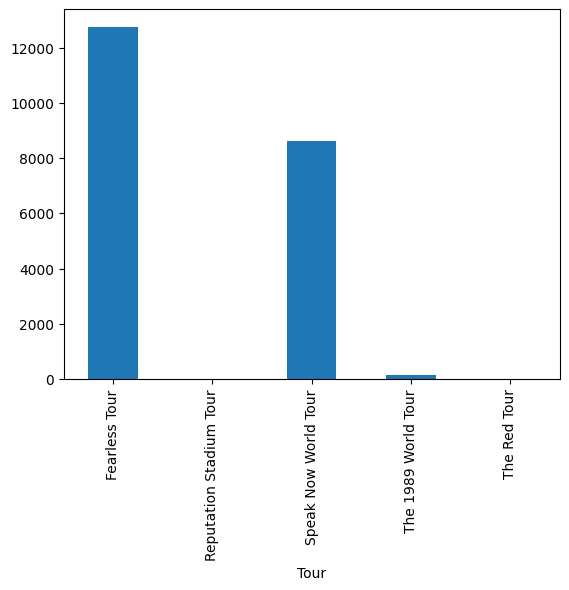

In [196]:
taylor_df.groupby('Tour')['Remaining Ticket'].sum().plot(kind="bar")

## Countries that was in the tour list (all tours)

She held her concerts mostly in the States, which is understandable because it's her home country

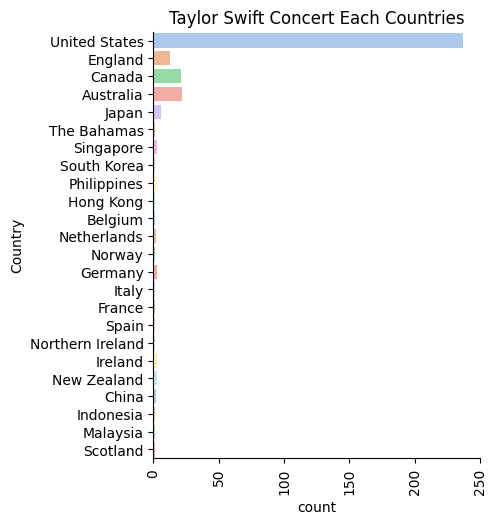

In [197]:
sns.catplot(data=taylor_df, y="Country", kind="count", palette="pastel").set(title="Taylor Swift Concert Each Countries").set_xticklabels(rotation=90)

In [198]:
taylor_df['Country'].value_counts()

United States       237
Australia            22
Canada               21
England              13
Japan                 6
Singapore             3
New Zealand           3
Germany               3
Ireland               3
Philippines           2
China                 2
Netherlands           2
Spain                 1
Malaysia              1
Indonesia             1
Northern Ireland      1
Norway                1
France                1
Italy                 1
Belgium               1
Hong Kong             1
South Korea           1
The Bahamas           1
Scotland              1
Name: Country, dtype: int64

## Tours Revenue

Reputation Stadium Tour has the most revenue, maybe due to the venue itself were stadiums

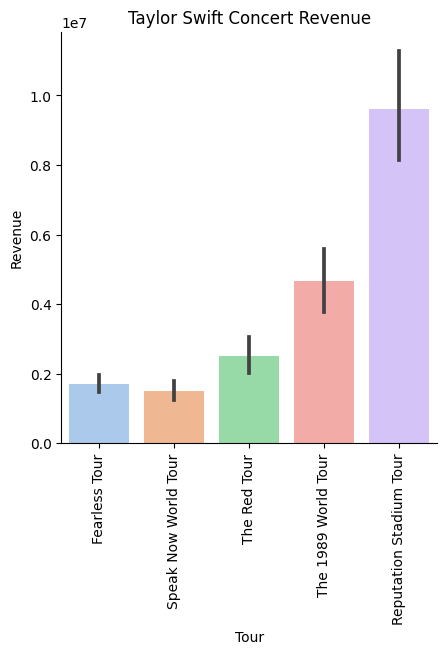

In [199]:
sns.catplot(data=taylor_df, x="Tour", y="Revenue", kind="bar", palette="pastel").set(title="Taylor Swift Concert Revenue").set_xticklabels(rotation=90)

## Analyzing Revenue


In [200]:
taylor_df['Show Opening Act'] = taylor_df.apply(lambda row: 'Have Opening Act' if row['Opening act(s)'] != 'No Opening Act(s)' else row['Opening act(s)'], axis=1)

In [201]:
taylor_df['Number of Opening Act(s)'] = taylor_df.apply(lambda row: '0' if row['Show Opening Act'] == 'No Opening Act(s)' else row['Number of Opening Act(s)'], axis=1)

In [209]:
no_opening_acts = taylor_df[taylor_df['Opening act(s)'] == "No Opening Act(s)"]
have_opening_acts = taylor_df[taylor_df['Opening act(s)'] != "No Opening Act(s)"]

I found it interesting because the revenue difference between tours with opening act and no opening acts is huge

In [203]:
# Calculate total ticket sold for each case
revenue_no_opening = no_opening_acts['Revenue'].sum()
revenue_with_opening = have_opening_acts['Revenue'].sum()

# Calculate average ticket sold for each case
revenue_avg_no_opening = no_opening_acts['Revenue'].mean()
revenue_avg_with_opening = have_opening_acts['Revenue'].mean()

# Print the results
print("Total Revenue when there were no opening acts:", revenue_no_opening)
print("Total Revenue when there were opening acts:", revenue_with_opening)
print("Average Revenue when there were no opening acts:", revenue_avg_no_opening)
print("Average Revenue when there were opening acts:", revenue_avg_with_opening)

Total Revenue when there were no opening acts: 72689174.81911263
Total Revenue when there were opening acts: 967456564.4300342
Average Revenue when there were no opening acts: 2907566.992764505
Average Revenue when there were opening acts: 3182422.909309323


The answer is because the number of shows with opening acts were a lot while shows with no opening act was only 24 shows

In [204]:
print("Shows with opening act: ", taylor_df[taylor_df['Show Opening Act'] == "Have Opening Act"].shape[0])
print("Shows with no opening act: ", taylor_df[taylor_df['Show Opening Act'] != "Have Opening Act"].shape[0])

Shows with opening act:  304
Shows with no opening act:  25


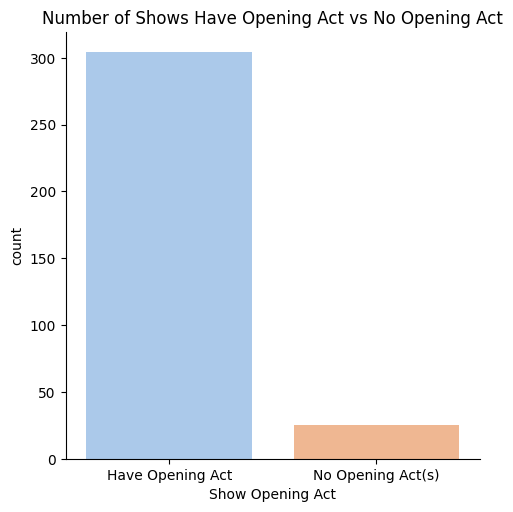

In [205]:
sns.catplot(data=taylor_df, x="Show Opening Act", kind="count", palette="pastel").set(title="Number of Shows Have Opening Act vs No Opening Act")

## Analyzing Ticket Price

since there is no ticket price column, i will make it by dividing revenue and ticket available

In [210]:
taylor_df['average_ticket_price'] = taylor_df['Revenue'] / taylor_df['Ticket Available']

In [211]:
taylor_df.head()

,City,Country,Venue,Opening act(s),Revenue,Tour,Number of Opening Act(s),Ticket Sold,Ticket Available,Remaining Ticket,Show Opening Act,average_ticket_price
0,Evansville,United States,Roberts Municipal Stadium,"Gloriana, Kellie Pickler",360617.00,Fearless Tour,1,7463.00,7463.00,0.00,Have Opening Act,48.32
1,Jonesboro,United States,Convocation Center,"Gloriana, Kellie Pickler",340328.00,Fearless Tour,1,7822.00,7822.00,0.00,Have Opening Act,43.51
2,St. Louis,United States,Scottrade Center,"Gloriana, Kellie Pickler",650420.00,Fearless Tour,1,13764.00,13764.00,0.00,Have Opening Act,47.26
3,Alexandria,United States,Bishop Ireton High School,"Gloriana, Kellie Pickler",3161537.20,Fearless Tour,1,32389.64,32454.97,65.33,Have Opening Act,97.41
4,North Charleston,United States,North Charleston Coliseum,"Gloriana, Kellie Pickler",398154.00,Fearless Tour,1,8751.00,8751.00,0.00,Have Opening Act,45.50


#### Check average ticket price
##### The average ticket price of tours with opening acts is much cheaper than no opening act

In [212]:
no_opening_acts = taylor_df[taylor_df['Opening act(s)'] == "No Opening Act(s)"]
have_opening_acts = taylor_df[taylor_df['Opening act(s)'] != "No Opening Act(s)"]

In [213]:
average_price_no_opening = no_opening_acts['average_ticket_price'].mean()
average_price_with_opening = have_opening_acts['average_ticket_price'].mean()
print("Average Ticket Price when there were No Opening Acts:", average_price_no_opening)
print("Average Ticket Price when there were Opening Acts:", average_price_with_opening)

Average Ticket Price when there were No Opening Acts: 99.19931479965997
Average Ticket Price when there were Opening Acts: 85.18976302376495


#### analyze tickets of each tours

In [215]:
taylor_df.groupby('Tour')['average_ticket_price'].mean()

Tour
Fearless Tour              70.13
Reputation Stadium Tour   119.63
Speak Now World Tour       72.12
The 1989 World Tour       109.33
The Red Tour               90.19
Name: average_ticket_price, dtype: float64

##### Fearless, Speak Now, & The 1989 tour also had some shows with no opening act, and the average ticket price was more expensive

In [216]:
no_opening_acts.groupby('Tour')['average_ticket_price'].mean()

Tour
Fearless Tour           91.29
Speak Now World Tour    83.51
The 1989 World Tour    127.72
The Red Tour           145.78
Name: average_ticket_price, dtype: float64

In [217]:
have_opening_acts.groupby('Tour')['average_ticket_price'].mean()

Tour
Fearless Tour              66.52
Reputation Stadium Tour   119.63
Speak Now World Tour       71.38
The 1989 World Tour       107.49
The Red Tour               89.25
Name: average_ticket_price, dtype: float64

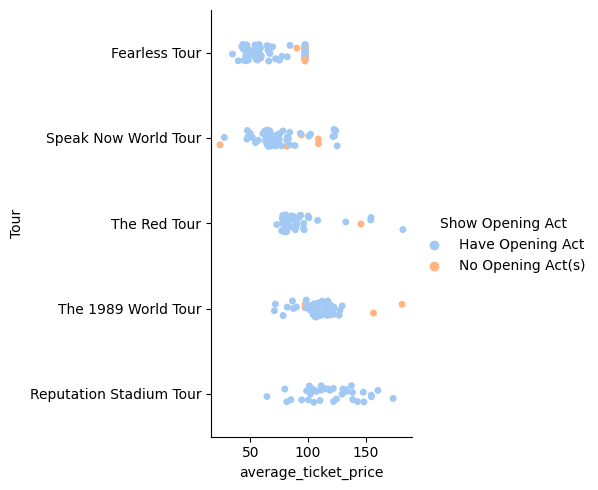

In [218]:
sns.catplot(data=taylor_df, y="Tour", x="average_ticket_price", hue="Show Opening Act",palette="pastel")

### Check average ticket sold

In [219]:
# Calculate total ticket sold for each case
total_sold_no_opening = no_opening_acts['Ticket Sold'].sum()
total_sold_with_opening = have_opening_acts['Ticket Sold'].sum()

# Calculate average ticket sold for each case
average_sold_no_opening = no_opening_acts['Ticket Sold'].mean()
average_sold_with_opening = have_opening_acts['Ticket Sold'].mean()

# Print the results
print("Total Ticket Sold when there were no opening acts:", total_sold_no_opening)
print("Total Ticket Sold when there were opening acts:", total_sold_with_opening)
print("Average Ticket Sold when there were no opening acts:", average_sold_no_opening)
print("Average Ticket Sold when there were opening acts:", average_sold_with_opening)

Total Ticket Sold when there were no opening acts: 705242.31292517
Total Ticket Sold when there were opening acts: 9950949.068027211
Average Ticket Sold when there were no opening acts: 28209.6925170068
Average Ticket Sold when there were opening acts: 32733.385092194774


#### Why ticket price with opening acts was cheaper? My assumption:
1.   Broad audience
2.   More sponsors
3. Bigger venue = more tickets
4. People paid cheaper tickets not only to see Taylor Swift but they could also see other big artists. More people buying tickets at a slightly lower price can contribute to higher revenue




#### And why the ticket price with no opening acts was more expensive?
##### My assumption is because of exclusivity; fans saw Taylor Swift only + there was only 24 shows in total without opening act, so it feels more exclusive


# ⏰ Revenue Prediction (Machine Learning)
## Trying Multiple Linear Regression & Decision Tree Regressor

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [221]:
taylor_model = taylor_df.copy()

In [222]:
taylor_model.head()

,City,Country,Venue,Opening act(s),Revenue,Tour,Number of Opening Act(s),Ticket Sold,Ticket Available,Remaining Ticket,Show Opening Act,average_ticket_price
0,Evansville,United States,Roberts Municipal Stadium,"Gloriana, Kellie Pickler",360617.00,Fearless Tour,1,7463.00,7463.00,0.00,Have Opening Act,48.32
1,Jonesboro,United States,Convocation Center,"Gloriana, Kellie Pickler",340328.00,Fearless Tour,1,7822.00,7822.00,0.00,Have Opening Act,43.51
2,St. Louis,United States,Scottrade Center,"Gloriana, Kellie Pickler",650420.00,Fearless Tour,1,13764.00,13764.00,0.00,Have Opening Act,47.26
3,Alexandria,United States,Bishop Ireton High School,"Gloriana, Kellie Pickler",3161537.20,Fearless Tour,1,32389.64,32454.97,65.33,Have Opening Act,97.41
4,North Charleston,United States,North Charleston Coliseum,"Gloriana, Kellie Pickler",398154.00,Fearless Tour,1,8751.00,8751.00,0.00,Have Opening Act,45.50


## ⚡ Machine Learning Model with Label Encoding

In [223]:
features = ['City', 'Country', 'Venue', 'Tour']
le = LabelEncoder()

for feature in features:
    le.fit(taylor_model[feature].unique())
    taylor_model[feature] = le.transform(taylor_model[feature])
    print(feature, taylor_model[feature].unique())

City [ 42  57 126   1  90  55  11  64 125 121 107  81  47  65 100 118 116  84
  29  49  97  17  18  41  32 142 134  30  20  24 110  77 105  37  94  23
 139  87  80 136  66  39  50  21  61  13  12  82  33  91 133 106  48  27
  54 111  76  69  14 128  89  70   0 131 130  95 127   7  31  22   5  26
  93 140  58  34  45 119  63 109  35 114  78  88 135  99 132  53   8 138
  44  83  19 124 122  96 108  52  15 112  98  92  74 101  68   9  38  75
  36  16  51  59  79 113 129 137   4  85   3  67 117  71  72  86 104   6
  40  25  43  10 123 115  56 103  60 141  28   2  46 120 102  62  73]
Country [23  4  2  0 11 22 19 20 17  7  1 13 16  6 10  5 21 15  9 14  3  8 12 18]
Venue [146  52 157  31 122  82 110 158 164  86 151  63  83 169 100 188  56  24
 107  73  65  14 133  50  30  95  53 189  45  47  27 123 194 163 142  78
 199  96 112  35  69  17  29 181  37  44  22  33  12 192  23 103 190 141
  51  10 173 197  99  34   5 119 147   6 202 168  15  25  68  13 196  84
 178 184  64  80 167 134 155  74 1

In [224]:
taylor_model.head()

,City,Country,Venue,Opening act(s),Revenue,Tour,Number of Opening Act(s),Ticket Sold,Ticket Available,Remaining Ticket,Show Opening Act,average_ticket_price
0,42,23,146,"Gloriana, Kellie Pickler",360617.00,0,1,7463.00,7463.00,0.00,Have Opening Act,48.32
1,57,23,52,"Gloriana, Kellie Pickler",340328.00,0,1,7822.00,7822.00,0.00,Have Opening Act,43.51
2,126,23,157,"Gloriana, Kellie Pickler",650420.00,0,1,13764.00,13764.00,0.00,Have Opening Act,47.26
3,1,23,31,"Gloriana, Kellie Pickler",3161537.20,0,1,32389.64,32454.97,65.33,Have Opening Act,97.41
4,90,23,122,"Gloriana, Kellie Pickler",398154.00,0,1,8751.00,8751.00,0.00,Have Opening Act,45.50


In [225]:
taylor_model.describe()

,City,Country,Venue,Revenue,Tour,Ticket Sold,Ticket Available,Remaining Ticket,average_ticket_price
count,329.00,329.00,329.00,329.00,329.00,329.00,329.00,329.00,329.00
mean,71.97,18.16,104.08,3161537.20,1.84,32389.64,32454.97,65.33,86.25
std,41.63,8.43,59.62,3508588.73,1.47,28848.00,28832.24,655.80,27.63
min,0.00,0.00,0.00,153303.00,0.00,3421.00,3962.00,0.00,23.74
25%,36.00,16.00,55.00,896946.00,0.00,13368.00,13368.00,0.00,65.34
50%,69.00,23.00,103.00,1870471.00,2.00,25617.00,25617.00,0.00,82.00
75%,109.00,23.00,157.00,3565317.00,3.00,38907.00,40122.00,0.00,101.56
max,142.00,23.00,205.00,22031386.00,4.00,174764.00,174764.00,10590.00,182.22


In [226]:
correlation = taylor_model['Revenue'].corr(taylor_model['Ticket Sold'])
print(f"Correlation between Revenue and Ticket Sold: {correlation}")

Correlation between Revenue and Ticket Sold: 0.9577251135855221


In [227]:
correlation = taylor_model['Revenue'].corr(taylor_model['Ticket Available'])
print(f"Correlation between Revenue and Ticket Available: {correlation}")

Correlation between Revenue and Ticket Available: 0.9573006454708936


In [228]:
correlation = taylor_model['Revenue'].corr(taylor_model['average_ticket_price'])
print(f"Correlation between Revenue and Ticket Price: {correlation}")

Correlation between Revenue and Ticket Price: 0.6029687741678412


In [229]:
def check_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).any()

print(check_outlier(taylor_model, 'Revenue'))

None


### Feature Scaling with Standardization

In [230]:
from sklearn.preprocessing import StandardScaler
msc = StandardScaler() # no need parameters bcs it will do the job

In [231]:
columns_to_scale = ['Ticket Available', 'Ticket Sold', 'average_ticket_price']

In [232]:
taylor_model[columns_to_scale] = msc.fit_transform(taylor_model[columns_to_scale])

In [233]:
taylor_model.head()

,City,Country,Venue,Opening act(s),Revenue,Tour,Number of Opening Act(s),Ticket Sold,Ticket Available,Remaining Ticket,Show Opening Act,average_ticket_price
0,42,23,146,"Gloriana, Kellie Pickler",360617.00,0,1,-0.87,-0.87,0.00,Have Opening Act,-1.37
1,57,23,52,"Gloriana, Kellie Pickler",340328.00,0,1,-0.85,-0.86,0.00,Have Opening Act,-1.55
2,126,23,157,"Gloriana, Kellie Pickler",650420.00,0,1,-0.65,-0.65,0.00,Have Opening Act,-1.41
3,1,23,31,"Gloriana, Kellie Pickler",3161537.20,0,1,0.00,-0.00,65.33,Have Opening Act,0.40
4,90,23,122,"Gloriana, Kellie Pickler",398154.00,0,1,-0.82,-0.82,0.00,Have Opening Act,-1.48


### Separating features & dependent variable

In [234]:
# X = pd.get_dummies(taylor_model['Country']) \ .join(taylor_model['Number of Opening Act(s)']) \ .join(taylor_model['Ticket Available']) \ .join(taylor_model['Ticket Sold']) \ .join(taylor_model['average_ticket_price'])
columns = ['Country', 'Number of Opening Act(s)', 'Ticket Sold', 'Ticket Available','average_ticket_price']
X = taylor_model[columns]
y = taylor_model['Revenue']

### Split Data

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Multiple Linear Regression

In [236]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [237]:
regressor_predict = regressor.predict(X_test)

In [238]:
predictdf = pd.DataFrame({'Actual Revenue':y_test, 'Predicted Revenue':regressor_predict})
predictdf.reset_index(drop=True, inplace=True)
predictdf.head(20)

,Actual Revenue,Predicted Revenue
0,3161537.20,3194831.86
1,12533166.00,12738525.45
2,1589686.00,2056885.82
3,6034846.00,6341824.04
4,3453549.00,4510480.75
5,4081820.00,4136563.17
6,1162733.00,1198675.30
7,4338127.00,4364520.54
8,1837147.00,1869941.01
9,8670990.00,9924760.41


In [239]:
from sklearn.metrics import mean_squared_error, r2_score
mse = np.sqrt(mean_squared_error(y_test,regressor_predict))
print(f'Mean error: {mse:3.3} ({mse/np.mean(regressor_predict)*100:3.3}%)')
score = regressor.score(X_test,y_test)
print('Model determination: ', score)

Mean error: 9.04e+05 (26.2%)
Model determination:  0.9422437212630939


#### although the model determination is high, the error of my model is also huge T.T

## Decision Tree Regression

In [240]:
tree_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [241]:
tree_predict = tree_regressor.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, tree_predict)
r2 = r2_score(y_test, tree_predict)
# Print the evaluation metrics
print("Mean Squared Error:", mse)

# Calculate and print mean error and model determination
mean_error = np.mean(np.abs(y_test - tree_predict))
print(f'Mean error: {mean_error:.3e} ({(mean_error/np.mean(tree_predict)*100):.3f}%)')

# Calculate and print model determination using test data
tree_score = tree_regressor.score(X_test, y_test)
print("R-squared:", r2)
print('Model determination: ', tree_score)

Mean Squared Error: 341322612561.8939
Mean error: 3.189e+05 (9.068%)
R-squared: 0.9758636822771489
Model determination:  0.9758636822771489


pretty good, 97% r-squared with 9% error (it's still big but not as big as my linear regression error)

In [242]:
predictdftree = pd.DataFrame({'Actual Revenue':y_test, 'Predicted Revenue':tree_predict})
predictdftree.reset_index(drop=True, inplace=True)
predictdftree.head(20)

,Actual Revenue,Predicted Revenue
0,3161537.20,3161537.20
1,12533166.00,11469887.00
2,1589686.00,1566321.00
3,6034846.00,6050643.00
4,3453549.00,3148046.00
5,4081820.00,3974410.00
6,1162733.00,1155170.00
7,4338127.00,4096060.00
8,1837147.00,2136270.00
9,8670990.00,8822335.00


### Cross-validation for my decision tree model

In [243]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation and get scores
cv_scores = cross_val_score(tree_regressor, X_train, y_train, cv=5)  # cv=5 for 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the average cross-validation score
average_cv_score = cv_scores.mean()
print("Average Cross-Validation Score:", average_cv_score)

Cross-Validation Scores: [0.95995871 0.89592848 0.91686323 0.95161794 0.9875011 ]
Average Cross-Validation Score: 0.9423738898425335


97% score with 94.35% average cross validation score, that means my decision tree model is performing well and is not showing significant overfitting 👍

## ✨ Predicting Revenue for Taylor Swift's The Eras Tour in Singapore
#### P.S. The concert spans six dates. Just a reminder that the dataframe doesn't include a date column. Therefore, I will make predictions based on the total capacity across all dates.

#### According to Google, there will be approximately 330,000 attendees, and all tickets have been fully sold out. The ticket prices for VIP range from 1228 to 328, while regular tickets range from 348 to 108.

### a little bit of data prep

In [244]:
taylor_model.columns

Index(['City', 'Country', 'Venue', 'Opening act(s)', 'Revenue', 'Tour',
       'Number of Opening Act(s)', 'Ticket Sold', 'Ticket Available',
       'Remaining Ticket', 'Show Opening Act', 'average_ticket_price'],
      dtype='object')

In [245]:
taylor_model['Number of Opening Act(s)']= taylor_model['Number of Opening Act(s)'].astype(int)

In [246]:
taylor_model.dtypes

City                          int64
Country                       int64
Venue                         int64
Opening act(s)               object
Revenue                     float64
Tour                          int64
Number of Opening Act(s)      int64
Ticket Sold                 float64
Ticket Available            float64
Remaining Ticket            float64
Show Opening Act             object
average_ticket_price        float64
dtype: object

In [247]:
taylor_tourlist = taylor_df[['Country']].rename(columns={'Country': 'Country Name'})
taylor_encoded = taylor_model[['Country']].rename(columns={'Country': 'Country Encoded'})

taylor_countries = pd.concat([taylor_tourlist, taylor_encoded], axis=1)

In [248]:
taylor_countries.head()

,Country Name,Country Encoded
0,United States,23
1,United States,23
2,United States,23
3,United States,23
4,United States,23


In [249]:
taylor_sg = taylor_countries[taylor_countries['Country Name']=="Singapore"]
taylor_sg

,Country Name,Country Encoded
111,Singapore,19
304,Singapore,19
380,Singapore,19


In [250]:
# columns = ['Country', 'Number of Opening Act(s)', 'Ticket Sold', 'Ticket Available','average_ticket_price']
scaler = StandardScaler()

scaler.fit(X_train[['Ticket Sold', 'Ticket Available', 'average_ticket_price']])  # Use only the relevant columns

# Scale the new input data for 'Ticket Available' and 'average_ticket_price'
scaled_ticket_available = scaler.transform([[330000, 330000, 446]])

# Get the label-encoded value for 'Country'
encoded_country = 19  # This is the label-encoded value for Singapore

# Combine the scaled features and the label-encoded 'Country' value
new_data = [encoded_country, 0, scaled_ticket_available[0][0], scaled_ticket_available[0][1], scaled_ticket_available[0][2]]

# Make predictions using the new input data
prediction = tree_regressor.predict([new_data])

# Print the prediction
print(prediction)

[22031386.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


She will gain 22 million dollars from Singapore only for holding a concerts for 6 days.
I think the number could be bigger if there is a dataset for The Eras Tour (her current tour in 2023-2024).

I learned that the artist generated 50%-70% revenue of the ticket price, not 100%. So I assume that 22 million dollars is for the artist.

## ⚡ Machine Learning Model with One Hot Encoding

In [251]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [252]:
taylor_onehot = taylor_df.copy()

In [253]:
'Number of Opening Act(s)', 'Ticket Sold', 'Ticket Available','average_ticket_price'

X = pd.get_dummies(taylor_onehot['Country']) \
        .join(pd.get_dummies(taylor_onehot['Venue'])) \
        .join(taylor_df['Number of Opening Act(s)']) \
        .join(taylor_df['Ticket Sold']) \
        .join(taylor_df['Ticket Available']) \
        .join(taylor_df['average_ticket_price'])

y = taylor_df['Revenue']

### Feature Scaling with Standardization

In [254]:
columns_to_scale = ['Ticket Available', 'Ticket Sold', 'average_ticket_price']
X[columns_to_scale] = msc.fit_transform(X[columns_to_scale])

In [255]:
X.head()

,Australia,Belgium,Canada,China,England,France,Germany,Hong Kong,Indonesia,Ireland,...,XL Center,Xcel Energy Center,Zepp Tokyo,Ziggo Dome,Zénith de Paris,iWireless Center,Number of Opening Act(s),Ticket Sold,Ticket Available,average_ticket_price
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,-0.87,-0.87,-1.37
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,-0.85,-0.86,-1.55
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,-0.65,-0.65,-1.41
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.00,-0.00,0.40
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,-0.82,-0.82,-1.48


### Split Data

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Decision Tree Model

In [257]:
tree_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

### Prediction Result

In [258]:
tree_predict = tree_regressor.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, tree_predict)
r2 = r2_score(y_test, tree_predict)
# Print the evaluation metrics
print("Mean Squared Error:", mse)

# Calculate and print mean error and model determination
mean_error = np.mean(np.abs(y_test - tree_predict))
print(f'Mean error: {mean_error:.3e} ({(mean_error/np.mean(tree_predict)*100):.3f}%)')

# Calculate and print model determination using test data
tree_score = tree_regressor.score(X_test, y_test)
print("R-squared:", r2)
print('Model determination: ', tree_score)

Mean Squared Error: 690479749118.5454
Mean error: 4.481e+05 (12.477%)
R-squared: 0.9511733533244956
Model determination:  0.9511733533244956


In [259]:
predictdftree = pd.DataFrame({'Actual Revenue':y_test, 'Predicted Revenue':tree_predict})
predictdftree.reset_index(drop=True, inplace=True)
predictdftree.head(20)

,Actual Revenue,Predicted Revenue
0,3161537.20,3161537.20
1,12533166.00,9464063.00
2,1589686.00,1527919.00
3,6034846.00,6050643.00
4,3453549.00,3336545.00
5,4081820.00,3974410.00
6,1162733.00,1132095.00
7,4338127.00,3974410.00
8,1837147.00,2407499.00
9,8670990.00,10242024.00


### Cross-validation for One Hot Encoding dataset

In [260]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation and get scores
cv_scores = cross_val_score(tree_regressor, X_train, y_train, cv=5)  # cv=5 for 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the average cross-validation score
average_cv_score = cv_scores.mean()
print("Average Cross-Validation Score:", average_cv_score)

Cross-Validation Scores: [0.95788554 0.88485164 0.9241166  0.95281132 0.9799173 ]
Average Cross-Validation Score: 0.9399164805808533


95% prediction score with 93% average cross-validation score, much closer than when I used LabelEncoder